In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.layers.experimental import preprocessing
from keras.optimizers import Adam
from keras.layers import Dropout
from keras import regularizers
from sklearn import preprocessing
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
import time
from datetime import datetime
import numpy as np

sns.set()

# Training Data:

In [2]:
#open data
file1 = 'training_data.csv'
sep =';'
data = pd.read_csv(file1, sep)

In [5]:
data

,id,timestamp,campaignId,platform,softwareVersion,sourceGameId,country,startCount,viewCount,clickCount,installCount,lastStart,startCount1d,startCount7d,connectionType,install
0,5c36658fb58fad351175f0b6,2019-01-09T21:20:15.943+00:00,59687f0d896a6b0e5ce6ea15,ios,11.4.1,1373094,US,25,24,0,2,2019-01-08T18:49:48.129+00:00,1,8,cellular,0
1,5c38d5ab1c16172870186b5a,2019-01-11T17:43:07.609+00:00,59687f0d896a6b0e5ce6ea15,ios,12.1,2739989,US,10,9,2,0,2019-01-09T21:20:22.855+00:00,1,4,cellular,0
2,5c38815de8f4e50e256e4f9c,2019-01-11T11:43:25.168+00:00,59687f0d896a6b0e5ce6ea15,ios,12.1.2,1373094,US,27,26,0,0,2019-01-09T10:42:08.446+00:00,1,2,cellular,0
3,5c409ace532d5806d2c6a5e6,2019-01-17T15:10:06.420+00:00,59687f0d896a6b0e5ce6ea15,ios,12.1.2,1217749,US,15,14,2,0,2019-01-16T19:58:11.636+00:00,3,14,wifi,0
4,5c3904b92d798c41e7f3088a,2019-01-11T21:03:53.145+00:00,59687f0d896a6b0e5ce6ea15,ios,12.0.1,1373094,US,20,18,0,0,2019-01-11T21:03:05.103+00:00,13,18,cellular,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999996,5c37848b506a613d24e71bd9,2019-01-10T17:44:43.599+00:00,5c274de34888b8c2a58c7c41,android,4.4.2,1711292,FR,1,0,0,1,NaN,1,1,wifi,0
999997,5c379b885d84334749ee8325,2019-01-10T19:22:48.219+00:00,5c274de34888b8c2a58c7c41,android,7.0,2762289,RU,191,170,9,1,2019-01-10T19:21:18.451+00:00,14,15,cellular,0
999998,5c4176bf76bb2670bff40944,2019-01-18T06:48:31.720+00:00,5c274de34888b8c2a58c7c41,android,7.1.1,1152400,IT,14,12,0,0,2019-01-18T06:47:41.177+00:00,14,14,wifi,0
999999,5c3e481105f2b6db6607ee09,2019-01-15T20:52:33.014+00:00,5c274de34888b8c2a58c7c41,android,6.0,2700609,DE,41,10,3,0,2019-01-15T20:51:37.401+00:00,41,41,wifi,0


In [6]:
data.describe().round(2)

,sourceGameId,startCount,viewCount,clickCount,installCount,startCount1d,startCount7d,install
count,1.000001e+06,1000001.00,1000001.00,1000001.00,1000001.00,1000001.00,1000001.0,1000001.00
mean,3.114280e+06,46.14,34.26,2.04,0.54,6.47,18.8,0.01
std,1.397085e+07,87.89,76.56,6.71,1.51,11.13,34.0,0.12
min,1.105500e+04,1.00,0.00,0.00,0.00,1.00,1.0,0.00
25%,1.196472e+06,5.00,2.00,0.00,0.00,1.00,3.0,0.00
50%,1.623384e+06,17.00,9.00,0.00,0.00,3.00,8.0,0.00
75%,2.633648e+06,50.00,32.00,2.00,0.00,7.00,21.0,0.00
max,1.316274e+08,3997.00,2886.00,1031.00,73.00,1202.00,3280.0,1.00


In [7]:
#looking for missing values
data.isna().sum()

id                     0
timestamp              0
campaignId             0
platform               0
softwareVersion        0
sourceGameId           0
country               39
startCount             0
viewCount              0
clickCount             0
installCount           0
lastStart          78824
startCount1d           0
startCount7d           0
connectionType         0
install                0
dtype: int64

In [8]:
#drop all samples with missing values as missing values hurt the main investigation
data = data.dropna()

In [9]:
data.isna().sum()

id                 0
timestamp          0
campaignId         0
platform           0
softwareVersion    0
sourceGameId       0
country            0
startCount         0
viewCount          0
clickCount         0
installCount       0
lastStart          0
startCount1d       0
startCount7d       0
connectionType     0
install            0
dtype: int64

In [10]:
#check the data types
data.dtypes

id                 object
timestamp          object
campaignId         object
platform           object
softwareVersion    object
sourceGameId        int64
country            object
startCount          int64
viewCount           int64
clickCount          int64
installCount        int64
lastStart          object
startCount1d        int64
startCount7d        int64
connectionType     object
install             int64
dtype: object

In [11]:
data['install'].value_counts()

0    908976
1     12167
Name: install, dtype: int64

In [12]:
#replacing default values with numerical ones
data['platform'].replace(['ios', 'android'], [0,1], inplace=True)
data['connectionType'].replace(['cellular', 'wifi', 'none'], [0,1,2], inplace=True)


C:\Users\averb\anaconda3\envs\tf\lib\site-packages\pandas\core\series.py:4479: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [13]:
softwareVersion_unique_values = data['softwareVersion'].unique()

In [14]:
data['softwareVersion'].replace(softwareVersion_unique_values, np.arange(0,len(softwareVersion_unique_values),1), inplace=True)

In [15]:
sourceGameId_unique_values = data['sourceGameId'].unique()

In [16]:
country_unique_values = data['country'].unique()

data['country'].replace(country_unique_values, np.arange(0,len(country_unique_values),1), inplace=True)

In [17]:
data.dtypes

id                 object
timestamp          object
campaignId         object
platform            int64
softwareVersion     int64
sourceGameId        int64
country             int64
startCount          int64
viewCount           int64
clickCount          int64
installCount        int64
lastStart          object
startCount1d        int64
startCount7d        int64
connectionType      int64
install             int64
dtype: object

In [18]:
campaignId_unique_values = data['campaignId'].unique()
a = np.arange(0,len(campaignId_unique_values),1)
data['campaignId'].replace(campaignId_unique_values, a, inplace=True)

In [19]:
data

,id,timestamp,campaignId,platform,softwareVersion,sourceGameId,country,startCount,viewCount,clickCount,installCount,lastStart,startCount1d,startCount7d,connectionType,install
0,5c36658fb58fad351175f0b6,2019-01-09T21:20:15.943+00:00,0,0,0,1373094,0,25,24,0,2,2019-01-08T18:49:48.129+00:00,1,8,0,0
1,5c38d5ab1c16172870186b5a,2019-01-11T17:43:07.609+00:00,0,0,1,2739989,0,10,9,2,0,2019-01-09T21:20:22.855+00:00,1,4,0,0
2,5c38815de8f4e50e256e4f9c,2019-01-11T11:43:25.168+00:00,0,0,2,1373094,0,27,26,0,0,2019-01-09T10:42:08.446+00:00,1,2,0,0
3,5c409ace532d5806d2c6a5e6,2019-01-17T15:10:06.420+00:00,0,0,2,1217749,0,15,14,2,0,2019-01-16T19:58:11.636+00:00,3,14,1,0
4,5c3904b92d798c41e7f3088a,2019-01-11T21:03:53.145+00:00,0,0,3,1373094,0,20,18,0,0,2019-01-11T21:03:05.103+00:00,13,18,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,5c34c1f60c3e37265e30c16b,2019-01-08T15:29:58.107+00:00,2327,1,13,2674503,6,10,8,1,0,2019-01-08T15:22:35.547+00:00,10,10,1,0
999997,5c379b885d84334749ee8325,2019-01-10T19:22:48.219+00:00,2327,1,12,2762289,6,191,170,9,1,2019-01-10T19:21:18.451+00:00,14,15,0,0
999998,5c4176bf76bb2670bff40944,2019-01-18T06:48:31.720+00:00,2327,1,10,1152400,9,14,12,0,0,2019-01-18T06:47:41.177+00:00,14,14,1,0
999999,5c3e481105f2b6db6607ee09,2019-01-15T20:52:33.014+00:00,2327,1,20,2700609,11,41,10,3,0,2019-01-15T20:51:37.401+00:00,41,41,1,0


In [20]:
b =data['timestamp'][0]
ts1 = pd.Timestamp(b, tz='utc').timestamp()
print(b)
ts1

2019-01-09T21:20:15.943+00:00


1547068815.943

In [21]:
#function to convert the time into numerical timestamp
def time_convert(x):
    try:
        return pd.Timestamp(x, tz='utc').timestamp()
    except:
        return x
   

In [22]:
data['timestamp'] = data['timestamp'].apply(time_convert)

<ipython-input-22-2ad37ad99416>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['timestamp'] = data['timestamp'].apply(time_convert)


In [23]:
data

,id,timestamp,campaignId,platform,softwareVersion,sourceGameId,country,startCount,viewCount,clickCount,installCount,lastStart,startCount1d,startCount7d,connectionType,install
0,5c36658fb58fad351175f0b6,1.547069e+09,0,0,0,1373094,0,25,24,0,2,2019-01-08T18:49:48.129+00:00,1,8,0,0
1,5c38d5ab1c16172870186b5a,1.547229e+09,0,0,1,2739989,0,10,9,2,0,2019-01-09T21:20:22.855+00:00,1,4,0,0
2,5c38815de8f4e50e256e4f9c,1.547207e+09,0,0,2,1373094,0,27,26,0,0,2019-01-09T10:42:08.446+00:00,1,2,0,0
3,5c409ace532d5806d2c6a5e6,1.547738e+09,0,0,2,1217749,0,15,14,2,0,2019-01-16T19:58:11.636+00:00,3,14,1,0
4,5c3904b92d798c41e7f3088a,1.547241e+09,0,0,3,1373094,0,20,18,0,0,2019-01-11T21:03:05.103+00:00,13,18,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,5c34c1f60c3e37265e30c16b,1.546961e+09,2327,1,13,2674503,6,10,8,1,0,2019-01-08T15:22:35.547+00:00,10,10,1,0
999997,5c379b885d84334749ee8325,1.547148e+09,2327,1,12,2762289,6,191,170,9,1,2019-01-10T19:21:18.451+00:00,14,15,0,0
999998,5c4176bf76bb2670bff40944,1.547794e+09,2327,1,10,1152400,9,14,12,0,0,2019-01-18T06:47:41.177+00:00,14,14,1,0
999999,5c3e481105f2b6db6607ee09,1.547586e+09,2327,1,20,2700609,11,41,10,3,0,2019-01-15T20:51:37.401+00:00,41,41,1,0


In [24]:
data['lastStart'] = data['lastStart'].apply(time_convert)

<ipython-input-24-d57d370973c8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['lastStart'] = data['lastStart'].apply(time_convert)


In [25]:
data['lastStart'].describe()

count    9.211430e+05
mean     1.547382e+09
std      4.714288e+05
min      1.544236e+09
25%      1.547072e+09
50%      1.547382e+09
75%      1.547759e+09
max      1.548115e+09
Name: lastStart, dtype: float64

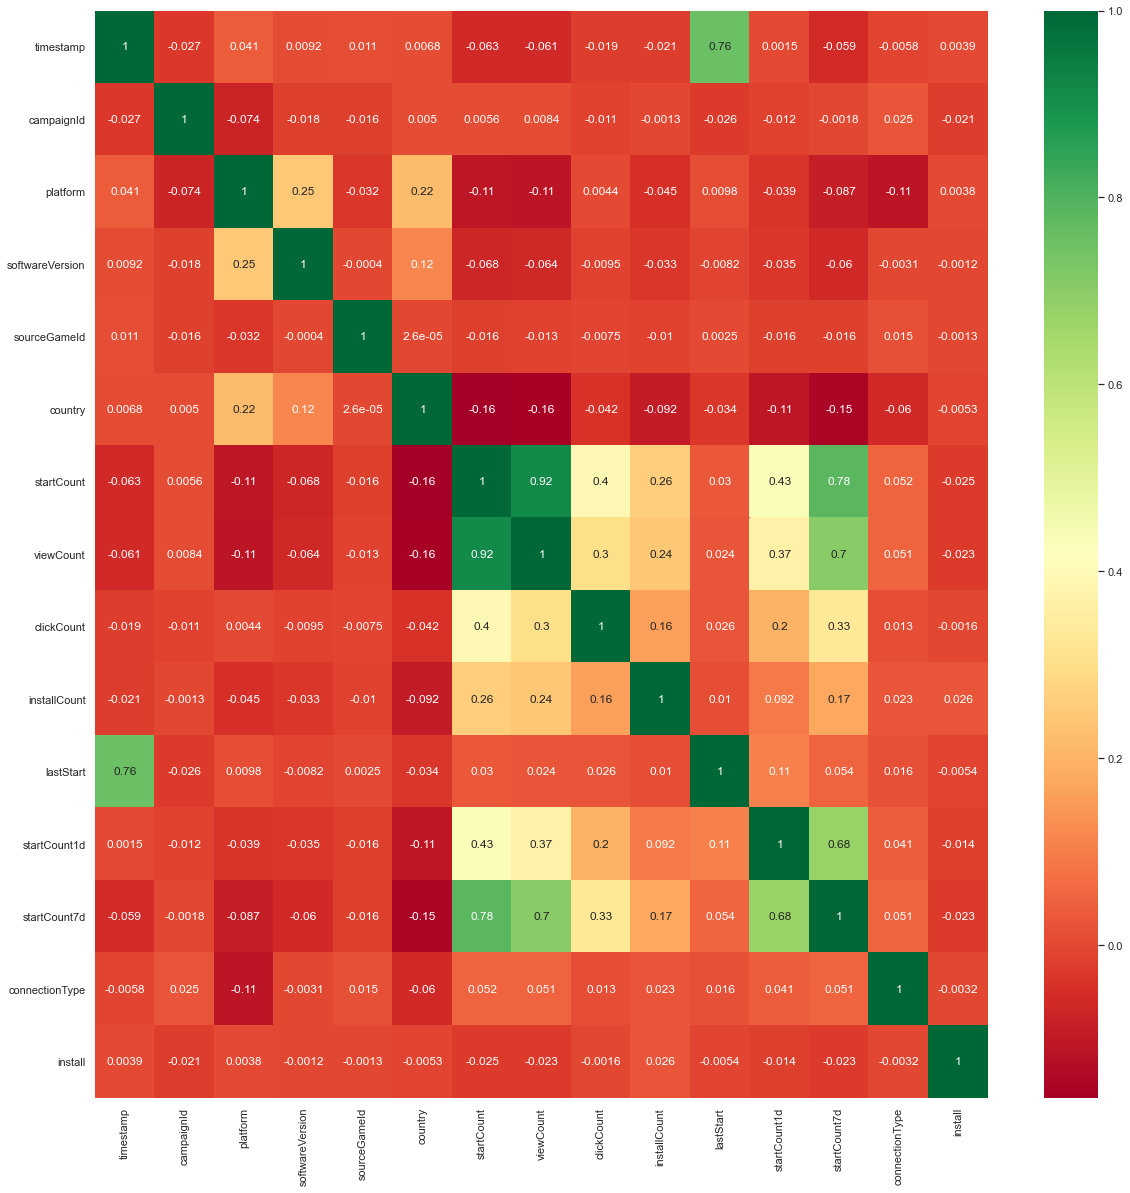

In [26]:
#plotting heat map of correlation coefficients
corrmatrix = data.corr()
top_corr_feat = corrmatrix.index
plt.figure(figsize=(20,20))
g=sns.heatmap(data[top_corr_feat].corr(),annot=True,cmap="RdYlGn")

# Data split

In [27]:
data = data.drop(['id'], axis =1)

In [28]:
data

,timestamp,campaignId,platform,softwareVersion,sourceGameId,country,startCount,viewCount,clickCount,installCount,lastStart,startCount1d,startCount7d,connectionType,install
0,1.547069e+09,0,0,0,1373094,0,25,24,0,2,1.546973e+09,1,8,0,0
1,1.547229e+09,0,0,1,2739989,0,10,9,2,0,1.547069e+09,1,4,0,0
2,1.547207e+09,0,0,2,1373094,0,27,26,0,0,1.547031e+09,1,2,0,0
3,1.547738e+09,0,0,2,1217749,0,15,14,2,0,1.547669e+09,3,14,1,0
4,1.547241e+09,0,0,3,1373094,0,20,18,0,0,1.547241e+09,13,18,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,1.546961e+09,2327,1,13,2674503,6,10,8,1,0,1.546961e+09,10,10,1,0
999997,1.547148e+09,2327,1,12,2762289,6,191,170,9,1,1.547148e+09,14,15,0,0
999998,1.547794e+09,2327,1,10,1152400,9,14,12,0,0,1.547794e+09,14,14,1,0
999999,1.547586e+09,2327,1,20,2700609,11,41,10,3,0,1.547585e+09,41,41,1,0


In [29]:
#preparing data
X = np.array(data.drop(['install'], 1))
y = np.array(data['install'])

In [30]:
from sklearn.preprocessing import MinMaxScaler
X_norm = MinMaxScaler().fit_transform(X)

In [31]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_norm, y, test_size=0.2, random_state=1)

print(X_train.shape, X_val_and_test.shape, Y_train.shape, Y_val_and_test.shape)

(736914, 14) (184229, 14) (736914,) (184229,)


# Filter methods

Chi-suare

In [76]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

chi = SelectKBest(chi2, k='all')
chi.fit(X_norm, y)

#prepare x and y data for future modelling
X_train_chi = chi.transform(X_train)
X_test_chi = chi.transform(X_val_and_test)

Feature 0: 2.635800
Feature 1: 67.194926
Feature 2: 3.398083
Feature 3: 0.057697
Feature 4: 0.688321
Feature 5: 3.483883
Feature 6: 24.267319
Feature 7: 27.458421
Feature 8: 0.050409
Feature 9: 35.304128
Feature 10: 0.492544
Feature 11: 3.415438
Feature 12: 9.738913
Feature 13: 1.567649


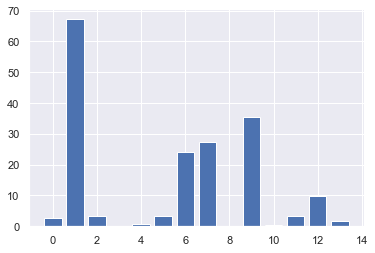

In [80]:
for i in range(len(chi.scores_)):
    print('Feature %d: %f' % (i, chi.scores_[i]))
# plot of the features importance
plt.bar([i for i in range(len(chi.scores_))], chi.scores_)
plt.show()

Mutual information

In [79]:
from sklearn.feature_selection import mutual_info_classif

mut_inf = SelectKBest(mutual_info_classif, k='all')
mut_inf.fit(X_norm, y)

#prepare x and y data for future modelling
X_train_mut = mut_inf.transform(X_train)
X_test_mut = mut_inf.transform(X_val_and_test)

Feature 0: 0.000061
Feature 1: 0.005160
Feature 2: 0.117731
Feature 3: 0.000973
Feature 4: 0.001865
Feature 5: 0.001346
Feature 6: 0.000798
Feature 7: 0.000496
Feature 8: 0.000211
Feature 9: 0.000309
Feature 10: 0.000162
Feature 11: 0.000285
Feature 12: 0.000651
Feature 13: 0.051020


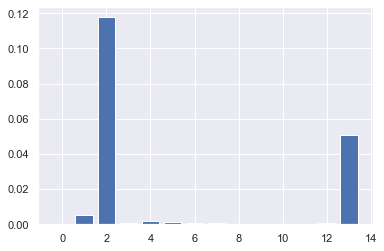

In [81]:
for i in range(len(mut_inf.scores_)):
    print('Feature %d: %f' % (i, mut_inf.scores_[i]))
# plot of the features importance
plt.bar([i for i in range(len(mut_inf.scores_))], mut_inf.scores_)
plt.show()

# Wrapper Method

Recursive Feature Elimination

In [95]:
from sklearn.ensemble import ExtraTreesClassifier

rfe = ExtraTreesClassifier()
rfe.fit(X_norm,y)

ExtraTreesClassifier()

In [98]:
print(rfe.feature_importances_)

[0.11140641 0.08413764 0.00214745 0.08098326 0.10481663 0.07925356
 0.08281129 0.08504993 0.06696052 0.04131481 0.11073221 0.06488631
 0.07399935 0.01150063]


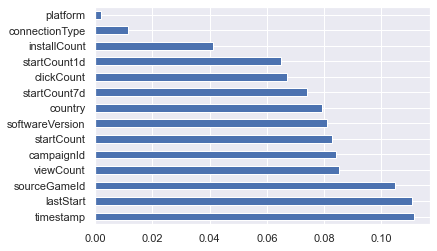

In [102]:
# Top important feeatures
imp = pd.Series(rfe.feature_importances_, index=data.iloc[:,0:14] .columns)
imp.nlargest(14).plot(kind='barh')
plt.show()

In [123]:
#dropping the useless data
X2 = np.array(data.drop(['install','platform','connectionType','installCount'], 1))

In [124]:
X2_norm = MinMaxScaler().fit_transform(X2)

In [125]:
X2_train, X2_val_and_test, Y2_train, Y2_val_and_test = train_test_split(X2_norm, y, test_size=0.2, random_state=1)

print(X2_train.shape, X2_val_and_test.shape, Y2_train.shape, Y2_val_and_test.shape)

(736914, 11) (184229, 11) (736914,) (184229,)


# Embedded Method

Embedded Random Forest

In [32]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

erf = SelectFromModel(RandomForestClassifier(n_estimators=100))
erf.fit(X_norm, y)

SelectFromModel(estimator=RandomForestClassifier())

In [33]:
#This array shows waht features are important(True) and not important(False)
erf.get_support()

array([ True,  True, False, False,  True, False, False, False, False,
       False,  True, False, False, False])

In [34]:
#prepare x and y data for future modelling
X_train_erf = erf.transform(X_train)
X_test_ref = erf.transform(X_val_and_test)

In [35]:
X_train_erf.shape

(736914, 4)

In [36]:
y.shape

(921143,)

# Models:

In [165]:
# validation and test sets for chi method

X_test, X_val, Y_test, Y_val = train_test_split(X_test_chi, Y_val_and_test, test_size=0.2, random_state=1)

print(X_test.shape, X_val.shape, Y_test.shape, Y_val.shape)

(147383, 14) (36846, 14) (147383,) (36846,)


In [104]:
#creating model
model = Sequential([
    Dense(32, activation='relu', input_dim=14),
    Dense(32, activation='relu'),
    Dropout(0.25),
    Dense(1, activation='sigmoid'),
])
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [105]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                480       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 1,569
Trainable params: 1,569
Non-trainable params: 0
_________________________________________________________________
None


In [107]:
#training model for chi method
h = model.fit(X_train_chi, Y_train,
          batch_size=10, epochs=50,
          validation_data=(X_val, Y_val))

Epoch 1/50
73692/73692 [==============================] - 29s 393us/step - loss: 0.0730 - accuracy: 0.9867 - val_loss: 0.0693 - val_accuracy: 0.9870
Epoch 2/50
73692/73692 [==============================] - 29s 390us/step - loss: 0.0709 - accuracy: 0.9868 - val_loss: 0.0693 - val_accuracy: 0.9870
Epoch 3/50
73692/73692 [==============================] - 28s 386us/step - loss: 0.0705 - accuracy: 0.9868 - val_loss: 0.0691 - val_accuracy: 0.9870
Epoch 4/50
73692/73692 [==============================] - 28s 385us/step - loss: 0.0702 - accuracy: 0.9868 - val_loss: 0.0691 - val_accuracy: 0.9870
Epoch 5/50
73692/73692 [==============================] - 29s 391us/step - loss: 0.0700 - accuracy: 0.9868 - val_loss: 0.0690 - val_accuracy: 0.9870
Epoch 6/50
73692/73692 [==============================] - 29s 388us/step - loss: 0.0699 - accuracy: 0.9868 - val_loss: 0.0690 - val_accuracy: 0.9870
Epoch 7/50
73692/73692 [==============================] - 29s 389us/step - loss: 0.0697 - accuracy: 0.9868

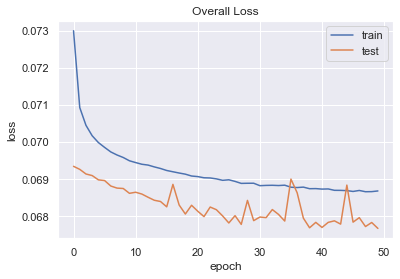

In [109]:
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title('Overall Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [110]:
#model evaluation
model.evaluate(X_test, Y_test)[1]

4606/4606 [==============================] - 1s 290us/step - loss: 0.0685 - accuracy: 0.9868


0.9867624044418335

modelling for mutual information

In [134]:
# validation and test sets for chi method

X_test, X_val, Y_test, Y_val = train_test_split(X_test_mut, Y_val_and_test, test_size=0.2, random_state=1)

print(X_test.shape, X_val.shape, Y_test.shape, Y_val.shape)

(147383, 14) (36846, 14) (147383,) (36846,)


In [112]:
#training model for mutual information method
h = model.fit(X_train_mut, Y_train,
          batch_size=10, epochs=50,
          validation_data=(X_val, Y_val))

Epoch 1/50
73692/73692 [==============================] - 29s 388us/step - loss: 0.0686 - accuracy: 0.9868 - val_loss: 0.0677 - val_accuracy: 0.9870
Epoch 2/50
73692/73692 [==============================] - 29s 391us/step - loss: 0.0687 - accuracy: 0.9868 - val_loss: 0.0677 - val_accuracy: 0.9870
Epoch 3/50
73692/73692 [==============================] - 29s 392us/step - loss: 0.0686 - accuracy: 0.9868 - val_loss: 0.0677 - val_accuracy: 0.9870
Epoch 4/50
73692/73692 [==============================] - 28s 387us/step - loss: 0.0686 - accuracy: 0.9868 - val_loss: 0.0686 - val_accuracy: 0.9870
Epoch 5/50
73692/73692 [==============================] - 29s 399us/step - loss: 0.0686 - accuracy: 0.9868 - val_loss: 0.0676 - val_accuracy: 0.9870
Epoch 6/50
73692/73692 [==============================] - 29s 392us/step - loss: 0.0686 - accuracy: 0.9868 - val_loss: 0.0677 - val_accuracy: 0.9870
Epoch 7/50
73692/73692 [==============================] - 29s 388us/step - loss: 0.0686 - accuracy: 0.9868

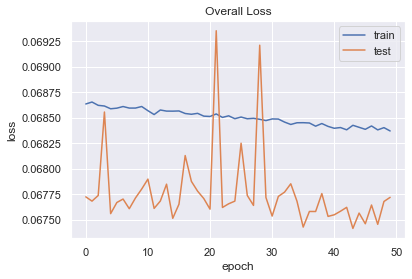

In [117]:
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title('Overall Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

Recursive Feature Elimination

In [136]:
# validation and test sets for chi method

X_test, X_val, Y_test, Y_val = train_test_split(X2_val_and_test, Y2_val_and_test, test_size=0.2, random_state=1)

print(X_test.shape, X_val.shape, Y_test.shape, Y_val.shape)

(147383, 11) (36846, 11) (147383,) (36846,)


In [148]:
X2_train.shape

(736914, 11)

In [149]:
Y_train.shape

(736914,)

In [141]:
#creating second model
model2 = Sequential([
    Dense(32, activation='relu', input_dim=11),
    Dense(32, activation='relu'),
    Dropout(0.25),
    Dense(1, activation='sigmoid'),
])
model2.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [142]:
h2 = model2.fit(X2_train, Y_train,
          batch_size=10, epochs=50,
          validation_data=(X_val, Y_val))

Epoch 1/50
73692/73692 [==============================] - 28s 386us/step - loss: 0.0733 - accuracy: 0.9868 - val_loss: 0.0693 - val_accuracy: 0.9870
Epoch 2/50
73692/73692 [==============================] - 29s 389us/step - loss: 0.0708 - accuracy: 0.9868 - val_loss: 0.0692 - val_accuracy: 0.9870
Epoch 3/50
73692/73692 [==============================] - 28s 386us/step - loss: 0.0704 - accuracy: 0.9868 - val_loss: 0.0692 - val_accuracy: 0.9870
Epoch 4/50
73692/73692 [==============================] - 28s 386us/step - loss: 0.0701 - accuracy: 0.9868 - val_loss: 0.0692 - val_accuracy: 0.9870
Epoch 5/50
73692/73692 [==============================] - 28s 386us/step - loss: 0.0700 - accuracy: 0.9868 - val_loss: 0.0691 - val_accuracy: 0.9870
Epoch 6/50
73692/73692 [==============================] - 29s 391us/step - loss: 0.0700 - accuracy: 0.9868 - val_loss: 0.0691 - val_accuracy: 0.9870
Epoch 7/50
73692/73692 [==============================] - 28s 384us/step - loss: 0.0698 - accuracy: 0.9868

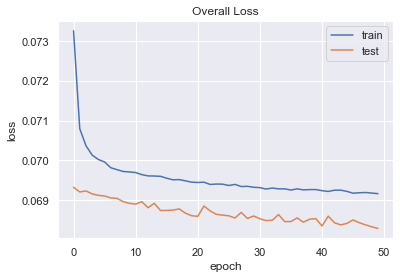

In [144]:
plt.plot(h2.history['loss'])
plt.plot(h2.history['val_loss'])
plt.title('Overall Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

Embedded Random Forest

In [38]:
# validation and test sets for Embedded Random Forest method

X_test, X_val, Y_test, Y_val = train_test_split(X_test_ref, Y_val_and_test, test_size=0.2, random_state=1)

print(X_test.shape, X_val.shape, Y_test.shape, Y_val.shape)

(147383, 4) (36846, 4) (147383,) (36846,)


In [39]:
#creating the third model
model3 = Sequential([
    Dense(32, activation='relu', input_dim=4),
    Dense(32, activation='relu'),
    Dropout(0.25),
    Dense(1, activation='sigmoid'),
])
model3.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [40]:
h3 = model3.fit(X_train_erf, Y_train,
          batch_size=10, epochs=50,
          validation_data=(X_val, Y_val))

Epoch 1/50
73692/73692 [==============================] - 28s 383us/step - loss: 0.0739 - accuracy: 0.9866 - val_loss: 0.0694 - val_accuracy: 0.9870
Epoch 2/50
73692/73692 [==============================] - 28s 378us/step - loss: 0.0707 - accuracy: 0.9868 - val_loss: 0.0693 - val_accuracy: 0.9870
Epoch 3/50
73692/73692 [==============================] - 28s 377us/step - loss: 0.0703 - accuracy: 0.9868 - val_loss: 0.0693 - val_accuracy: 0.9870
Epoch 4/50
73692/73692 [==============================] - 28s 378us/step - loss: 0.0701 - accuracy: 0.9868 - val_loss: 0.0693 - val_accuracy: 0.9870
Epoch 5/50
73692/73692 [==============================] - 28s 377us/step - loss: 0.0701 - accuracy: 0.9868 - val_loss: 0.0692 - val_accuracy: 0.9870
Epoch 6/50
73692/73692 [==============================] - 28s 378us/step - loss: 0.0700 - accuracy: 0.9868 - val_loss: 0.0692 - val_accuracy: 0.9870
Epoch 7/50
73692/73692 [==============================] - 28s 376us/step - loss: 0.0699 - accuracy: 0.9868

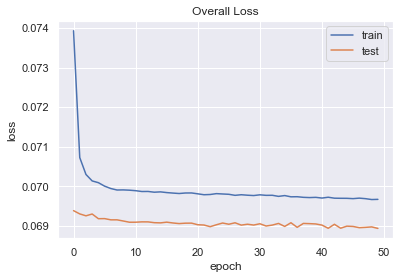

In [42]:
plt.plot(h3.history['loss'])
plt.plot(h3.history['val_loss'])
plt.title('Overall Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()